In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load the data
data = pd.read_csv('/content/ICReadDynamicEnergy.csv', delimiter=',')

# Separate features (X) and target variable (y)
X = data.iloc[:, :2]  # First two columns: MemCellType and numRowSubArray/numColSubArray
y = data.iloc[:, 2:]  # Columns from position 2 onwards: Layer1, Layer2, ...

# Create and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=40)
model.fit(X, y)

# Now you can use this model to predict IC read dynamic energy for new data
# For example, if you want to predict IC read dynamic energy for MemCellType=1, numRowSubArray/numColSubArray=64, and Layer=10
new_data = pd.DataFrame({
    'MemCellType': [1],
    'numRowSubArray/numColSubArray': [512]
})
training_accuracy = model.score(X, y)
print(f"Training Accuracy: {training_accuracy*100}%")
# Predicting IC read dynamic energy for new data
predicted_ic_read_dynamic_energy = model.predict(new_data)
print("Predicted IC Read Dynamic Energy:", predicted_ic_read_dynamic_energy)


Training Accuracy: 91.29256298041803%
Predicted IC Read Dynamic Energy: [[5.34175990e+04 1.05135550e+05 3.35251480e+05 1.12793697e+05
  3.94429560e+05 1.20452369e+05 4.53606860e+05 1.28111142e+05
  5.66684360e+05 1.35769314e+05 6.25862420e+05 1.43427986e+05
  6.85039670e+05 1.15154196e+05 3.01131160e+04 9.87854010e+04
  3.20276910e+04 1.23410950e+05 3.39423410e+04 1.36298790e+05
  3.58569520e+04 1.49186570e+05 3.77716020e+04 1.62074350e+05
  3.96862080e+04 1.74961620e+05 3.59857740e+04 8.00692760e+03
  2.26673550e+04 8.48559210e+03 2.50345040e+04 8.96424340e+03
  2.74015820e+04 9.44289590e+03 2.97687420e+04 9.92155220e+03
  3.21358090e+04 1.04001819e+04 3.03144220e+04 9.40328130e+01]]


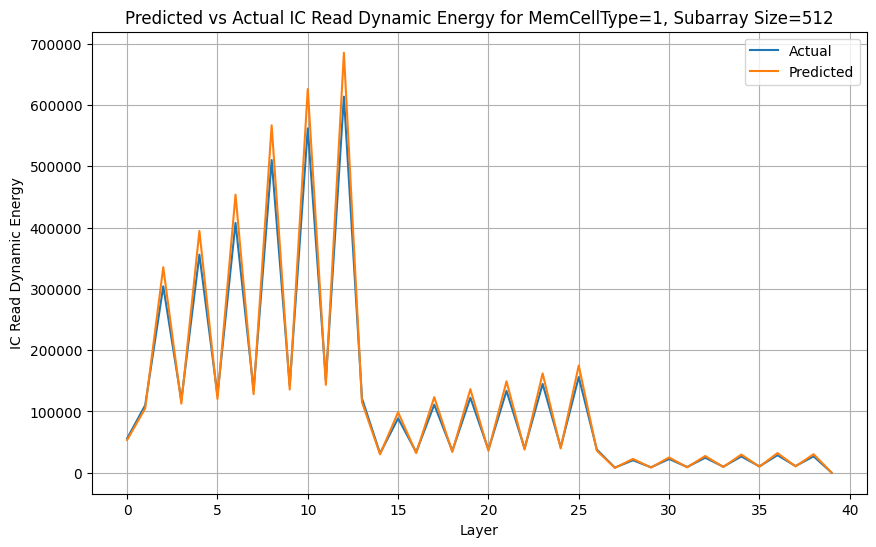

In [6]:
import matplotlib.pyplot as plt

# Choose MemCellType and numRowSubArray/numColSubArray
mem_cell_type = 1
subarray_size = 512

# Filter the training data for the chosen MemCellType and numRowSubArray/numColSubArray
filtered_data = data[(data['MemCellType'] == mem_cell_type) & (data['numRowSubArray/numColSubArray'] == subarray_size)]

# Extract the actual IcReadDynamicEnergy values
actual_values = filtered_data.iloc[:, 2:]

# Plot the predicted IcReadDynamicEnergy and the actual IcReadDynamicEnergy values
plt.figure(figsize=(10, 6))
plt.plot(actual_values.values[0], label='Actual')
plt.plot(predicted_ic_read_dynamic_energy[0], label='Predicted')
plt.xlabel('Layer')
plt.ylabel('IC Read Dynamic Energy')
plt.title(f'Predicted vs Actual IC Read Dynamic Energy for MemCellType={mem_cell_type}, Subarray Size={subarray_size}')
plt.legend()
plt.grid(True)
plt.show()


Training Accuracy: 0.7687576857779602


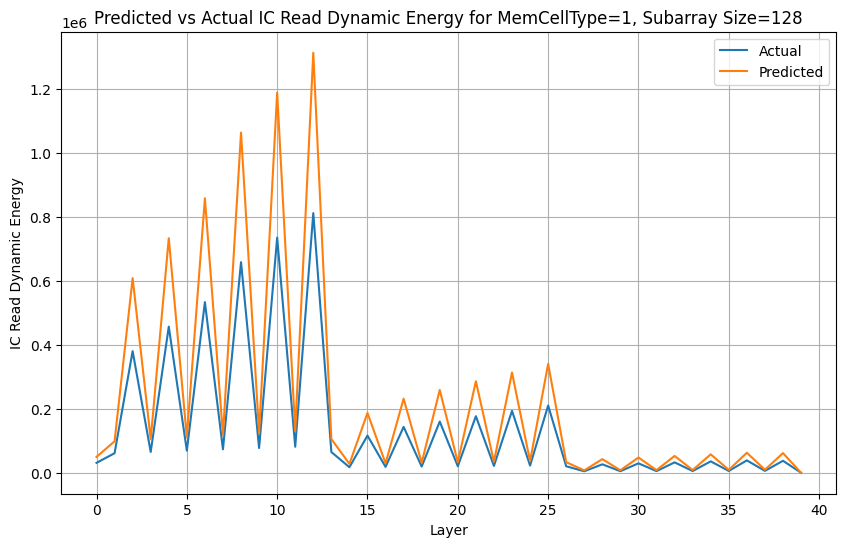

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/ICReadDynamicEnergy.csv', delimiter=',')

# Separate features (X) and target variable (y)
X = data.iloc[:, :2]  # First two columns: MemCellType and numRowSubArray/numColSubArray
y = data.iloc[:, 2:]  # Columns from position 2 onwards: Layer1, Layer2, ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=40)
model.fit(X_train, y_train)

# Predicting IC read dynamic energy for the testing data
predicted_ic_read_dynamic_energy_test = model.predict(X_test)

# Plot a graph comparing the predicted and actual IC read dynamic energy values for a specific MemCellType and numRowSubArray/numColSubArray
mem_cell_type = 1
subarray_size = 128
training_accuracy = model.score(X, y)
print(f"Training Accuracy: {training_accuracy}")

# Filter the testing data for the chosen MemCellType and numRowSubArray/numColSubArray
filtered_data_test = X_test[(X_test['MemCellType'] == mem_cell_type) & (X_test['numRowSubArray/numColSubArray'] == subarray_size)]

if not filtered_data_test.empty:
    index_test = filtered_data_test.index[0]

    # Extract the actual IC read dynamic energy values for the chosen MemCellType and numRowSubArray/numColSubArray
    actual_values_test = y_test.iloc[index_test]

    # Plot the predicted and actual IC read dynamic energy values
    plt.figure(figsize=(10, 6))
    plt.plot(actual_values_test.values, label='Actual')
    plt.plot(predicted_ic_read_dynamic_energy_test[index_test], label='Predicted')
    plt.xlabel('Layer')
    plt.ylabel('IC Read Dynamic Energy')
    plt.title(f'Predicted vs Actual IC Read Dynamic Energy for MemCellType={mem_cell_type}, Subarray Size={subarray_size}')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No data found for the specified MemCellType and Subarray Size.")
